<a href="https://colab.research.google.com/github/pk-rcb/machine-learning/blob/master/projects/car_price_prediction_lin%2Blasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [12]:
#loading the data from csv file to pandas dataframe

In [24]:
car_dataset = pd.read_csv("/content/car data.csv")

In [25]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
 car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [27]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


ENCODING

In [48]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [43]:
car_dataset.replace({'Seller_Type' :{'Dealer' :0,'Individual' :1}},inplace=True)

In [44]:
car_dataset.replace({'Transmission' :{'Manual' :0,'Automatic':1}},inplace=True)

In [47]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [51]:
#removing car name and selling price
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [53]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [54]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [55]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [68]:
#Splitting the data into test and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size =0.1,random_state=2 )

model training

In [69]:
lin_reg_model = LinearRegression()

In [80]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [73]:
#prediction on traing data
training_data_prediction = lin_reg_model.predict(X_train)

In [74]:
#using r squarred error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8799451660493711


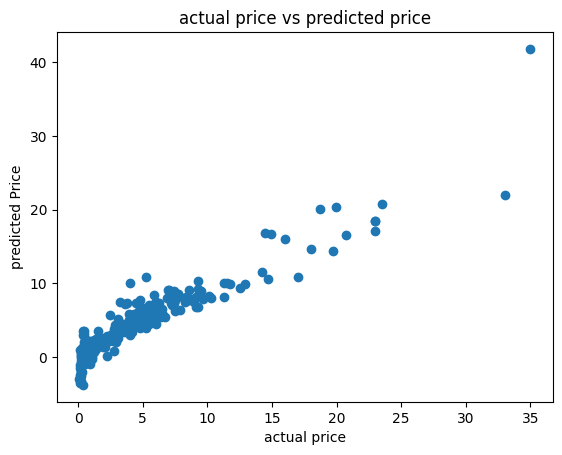

In [75]:
#visalisation of actual price and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted Price")
plt.title("actual price vs predicted price")
plt.show()

In [76]:
#prediction on test data
test_data_prediction= lin_reg_model.predict(X_test)

In [78]:
#r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715027051


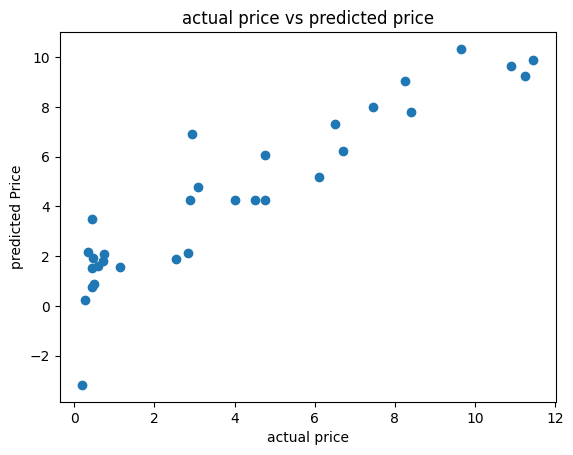

In [79]:
#visalisation of actual price and predicted price
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted Price")
plt.title("actual price vs predicted price")
plt.show()

Lasso Regression


In [81]:
lasso_reg_model = Lasso()

In [82]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [83]:
#prediction on traing data
training_data_prediction = lasso_reg_model.predict(X_train)

In [84]:
#using r squarred error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8427856123435794


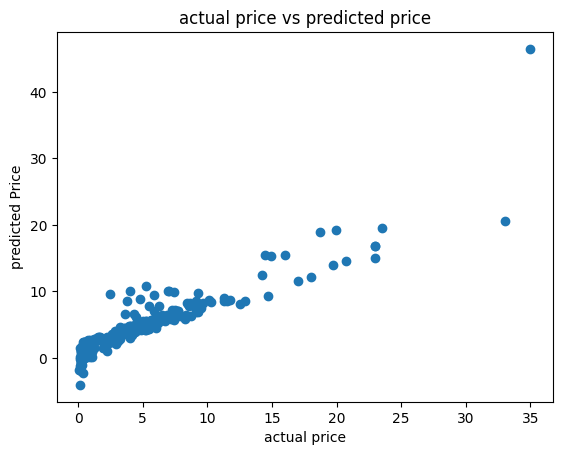

In [85]:
#visalisation of actual price and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted Price")
plt.title("actual price vs predicted price")
plt.show()

In [86]:
#prediction on test data
test_data_prediction= lasso_reg_model.predict(X_test)

In [87]:
#r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8709167941173195


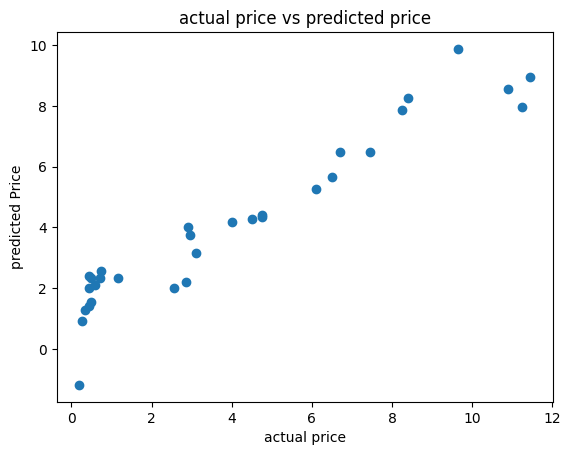

In [88]:
#visalisation of actual price and predicted price
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted Price")
plt.title("actual price vs predicted price")
plt.show()

Lasso Regression
